LINEAR REGRESSION USING NEURAL NETWORK

Import the nessary library

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Flatten,InputLayer
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("drug200_1722406166375.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,class
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
pd.get_dummies(data)

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,class_drugA,class_drugB,class_drugC,class_drugX,class_drugY
0,23,25.355,True,False,True,False,False,True,False,False,False,False,False,True
1,47,13.093,False,True,False,True,False,True,False,False,False,True,False,False
2,47,10.114,False,True,False,True,False,True,False,False,False,True,False,False
3,28,7.798,True,False,False,False,True,True,False,False,False,False,True,False
4,61,18.043,True,False,False,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,True,False,False,True,False,True,False,False,False,True,False,False
196,16,12.006,False,True,False,True,False,True,False,False,False,True,False,False
197,52,9.894,False,True,False,False,True,True,False,False,False,False,True,False
198,23,14.020,False,True,False,False,True,False,True,False,False,False,True,False


assign x and y datas

In [4]:
x=data['Age']
y=data['Na_to_K']

split the data into for train,test,test size=30%,train size=70%

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,shuffle=True)
x_train.shape,y_train.shape

((140,), (140,))

Creating the model using tensorflow keras layes,
Here use dense layer which is fully connected neurons network with the activion funtion is relu(retified linear unit) and contain 100 neurons for layer 1 and same as layer 2
in layer three one neuron for output layer because we apply the linear regression the class values continues

In [39]:
model=tf.keras.Sequential([
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(1),
    ])

compile our model with specific parameter
we define loss funtion as mean absolute error , optimizer as adam with the learing rate is 0.00001,metrics is mae,mse

In [40]:
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['mse','mae'])

In [41]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Here we train our model wite ephoch 50

In [42]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 14.3281 - mae: 14.3281 - mse: 258.0974
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.2377 - mae: 13.2377 - mse: 226.6772 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.6385 - mae: 11.6385 - mse: 191.0589 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3651 - mae: 11.3651 - mse: 190.5358 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.3724 - mae: 10.3724 - mse: 169.4362 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7581 - mae: 9.7581 - mse: 151.9323   
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3960 - mae: 8.3960 - mse: 125.1649 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8250 - mae: 7.8250 - mse: 107.6072 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8020 - mae: 7.8020 - mse: 107.1441
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7063 - mae: 7.7063 - mse: 107.5380 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [43]:
y_pred=model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [44]:
model.evaluate(y_pred,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.8521 - mae: 12.8521 - mse: 221.0592  


[12.494832992553711, 211.2228240966797, 12.494832992553711]

Finally we plot the linear regression 

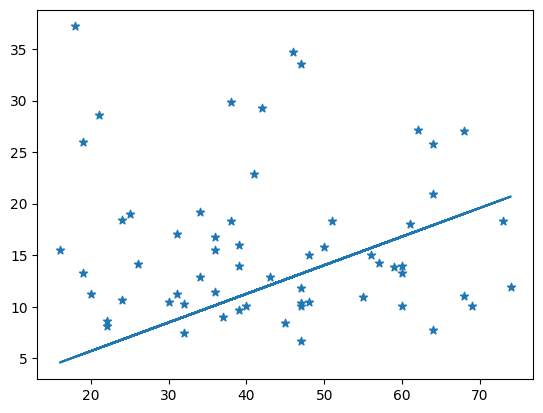

In [45]:
plt.scatter(x_test,y_test,marker='*')
plt.plot(x_test,y_pred)